# Model Evaluation and Validation Lecture

In this lecture, we will cover:
- Data Splitting and Cross-Validation (train/test split, KFold, StratifiedKFold, etc.)
- Evaluation metrics for Classification and Regression
- Visualizations: Confusion Matrices, ROC Curves, Residual Plots, etc.
- Hyperparameter Tuning (GridSearchCV)
- Comparison of different models using cross-validation

This lecture is designed for use in Google Colab/Jupyter Notebook.


In [29]:
# Import Libraries and Set Up Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                     RepeatedKFold, cross_validate, cross_val_score, GridSearchCV)
from sklearn.metrics import (make_scorer, accuracy_score, precision_score, recall_score, f1_score,
                             log_loss, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
                             mean_absolute_error, mean_squared_error, r2_score)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# For 3D plots and animations (if needed)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Set plotting style
sns.set(style="whitegrid")
%matplotlib inline


## Data Splitting and Cross-Validation

We begin by reviewing standard data splitting techniques and cross-validation strategies.


### Classification Example: Breast Cancer Dataset

We use the Breast Cancer dataset (binary classification) and evaluate different classifiers.


In [30]:
# Load Breast Cancer Dataset and Prepare Data
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

print("Breast Cancer dataset shapes:")
print("X:", X_bc.shape, "y:", y_bc.shape)


Breast Cancer dataset shapes:
X: (569, 30) y: (569,)


In [31]:
# Define Function for CV Comparison
from sklearn.metrics import make_scorer

def compare_cv_methods(model, X, y):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1_score': make_scorer(f1_score, average='weighted'),
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

    cv_results_kf = cross_validate(model, X, y, cv=kf, scoring=scoring)
    cv_results_skf = cross_validate(model, X, y, cv=skf, scoring=scoring)
    cv_results_rkf = cross_validate(model, X, y, cv=rkf, scoring=scoring)

    # Aggregate mean scores
    metrics = list(scoring.keys())
    results = []
    for metric in metrics:
        kf_score = np.mean(cv_results_kf['test_' + metric])
        skf_score = np.mean(cv_results_skf['test_' + metric])
        rkf_score = np.mean(cv_results_rkf['test_' + metric])
        results.append({'Metric': metric, 'KFold': kf_score, 'StratifiedKFold': skf_score, 'RepeatedKFold': rkf_score})

    results_df = pd.DataFrame(results)
    return results_df

# Example for Logistic Regression on Breast Cancer dataset
lr = LogisticRegression(max_iter=10000)
results_lr = compare_cv_methods(lr, X_bc, y_bc)
print("CV Comparison for Logistic Regression (Breast Cancer):")
display(results_lr)


CV Comparison for Logistic Regression (Breast Cancer):


,Metric,KFold,StratifiedKFold,RepeatedKFold
0,accuracy,0.950737,0.954339,0.951630
1,precision,0.951186,0.956086,0.952271
2,recall,0.950737,0.954339,0.951630
3,f1_score,0.950580,0.954099,0.951532


## Classification Model Evaluation Examples

We now evaluate various classifiers on standard datasets and visualize the results.


Logistic Regression Classification Report:
              precision    recall  f1-score     support
0              0.966102  0.890625  0.926829   64.000000
1              0.937500  0.981308  0.958904  107.000000
accuracy       0.947368  0.947368  0.947368    0.947368
macro avg      0.951801  0.935967  0.942867  171.000000
weighted avg   0.948205  0.947368  0.946899  171.000000
Logistic Regression Metrics:
Accuracy: 0.9473684210526315
Weighted F1 Score: 0.9468994906243223
Log Loss: 0.11897176961474364


<Figure size 800x600 with 0 Axes>

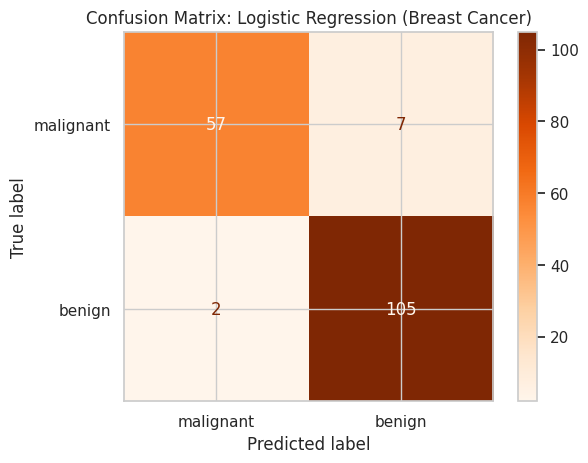

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score     support
0              0.966102  0.890625  0.926829   64.000000
1              0.937500  0.981308  0.958904  107.000000
accuracy       0.947368  0.947368  0.947368    0.947368
macro avg      0.951801  0.935967  0.942867  171.000000
weighted avg   0.948205  0.947368  0.946899  171.000000
Gaussian Naive Bayes Metrics:
Accuracy: 0.9473684210526315
Weighted F1 Score: 0.9468994906243223
Log Loss: 0.33819522327849943


<Figure size 800x600 with 0 Axes>

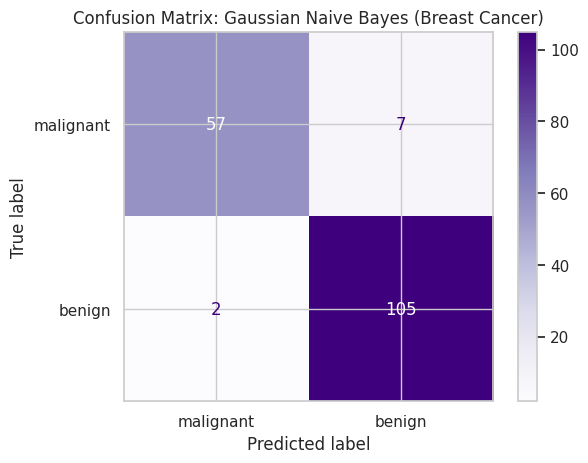

In [32]:
from sklearn.metrics import classification_report

# Evaluate Logistic Regression and Gaussian Naive Bayes on Breast Cancer

# Logistic Regression
lr.fit(X_train_bc, y_train_bc)
y_lr_pred = lr.predict(X_test_bc)
y_lr_prob = lr.predict_proba(X_test_bc)

print("Logistic Regression Classification Report:")
print(pd.DataFrame(classification_report(y_test_bc, y_lr_pred, output_dict=True)).T)
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test_bc, y_lr_pred))
print("Weighted F1 Score:", f1_score(y_test_bc, y_lr_pred, average='weighted'))
print("Log Loss:", log_loss(y_test_bc, y_lr_prob))

# Plot Confusion Matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_bc, y_lr_pred),
                                 display_labels=breast_cancer.target_names)
plt.figure(figsize=(8,6))
disp_lr.plot(cmap='Oranges')
plt.title("Confusion Matrix: Logistic Regression (Breast Cancer)")
plt.show()

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_bc, y_train_bc)
y_gnb_pred = gnb.predict(X_test_bc)
y_gnb_prob = gnb.predict_proba(X_test_bc)

print("Gaussian Naive Bayes Classification Report:")
print(pd.DataFrame(classification_report(y_test_bc, y_gnb_pred, output_dict=True)).T)
print("Gaussian Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test_bc, y_gnb_pred))
print("Weighted F1 Score:", f1_score(y_test_bc, y_gnb_pred, average='weighted'))
print("Log Loss:", log_loss(y_test_bc, y_gnb_prob))

# Plot Confusion Matrix for Gaussian Naive Bayes
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_bc, y_gnb_pred),
                                  display_labels=breast_cancer.target_names)
plt.figure(figsize=(8,6))
disp_gnb.plot(cmap='Purples')
plt.title("Confusion Matrix: Gaussian Naive Bayes (Breast Cancer)")
plt.show()


### ROC Curves for Binary Classification

We'll plot ROC curves for Logistic Regression using StratifiedKFold.


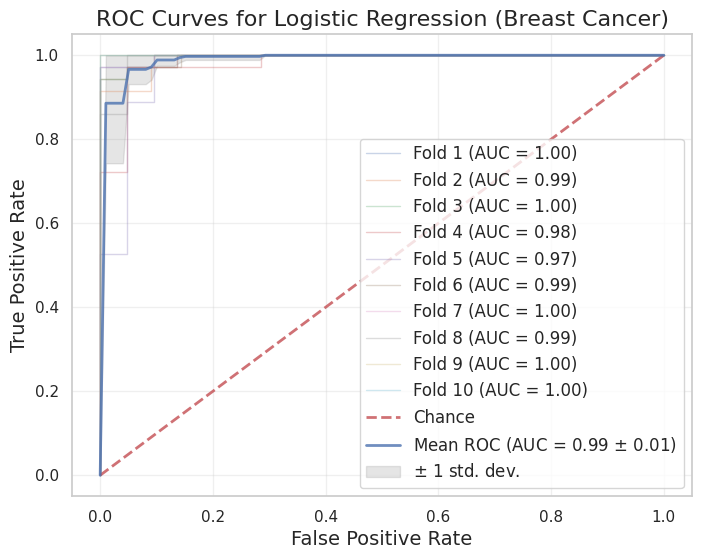

In [33]:
# Plot ROC Curves for Logistic Regression across 5 Folds

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(8, 6))
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i, (train_index, test_index) in enumerate(cv.split(X_bc, y_bc)):
    X_train_cv, X_test_cv = X_bc[train_index], X_bc[test_index]
    y_train_cv, y_test_cv = y_bc[train_index], y_bc[test_index]

    lr_cv = LogisticRegression(max_iter=10000)
    lr_cv.fit(X_train_cv, y_train_cv)
    y_pred_prob = lr_cv.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_pred_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = {:.2f} $\pm$ {:.2f})'.format(mean_auc, std_auc),
         lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Logistic Regression (Breast Cancer)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()



## Regression Model Evaluation Examples

We now switch to regression. We'll use the California Housing dataset (a modern alternative to Boston housing) to evaluate regression metrics.


Regression Metrics (California Housing):
RMSE: 0.7284008391515455
MAE: 0.5272474538306174
R2 Score: 0.595770232606166


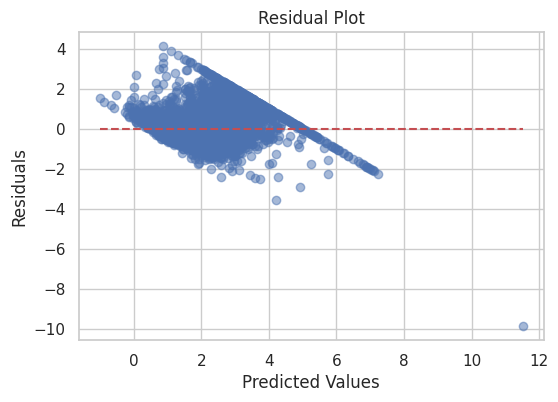

In [34]:
# Regression Example using California Housing dataset
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X_cal = california.data
y_cal = california.target

# Train/Test Split
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(X_cal, y_cal, test_size=0.3, random_state=42)

# Train a Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_cal, y_train_cal)

# Predictions and Evaluation
y_cal_pred = reg_model.predict(X_test_cal)
rmse = np.sqrt(mean_squared_error(y_test_cal, y_cal_pred))
mae = mean_absolute_error(y_test_cal, y_cal_pred)
r2 = r2_score(y_test_cal, y_cal_pred)

print("Regression Metrics (California Housing):")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

# Residual Plot
plt.figure(figsize=(6,4))
plt.scatter(y_cal_pred, y_test_cal - y_cal_pred, alpha=0.5)
plt.hlines(y=0, xmin=y_cal_pred.min(), xmax=y_cal_pred.max(), colors='r', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Hyperparameter Tuning and Cross-Validation

We'll demonstrate hyperparameter optimization using GridSearchCV for KNN (as a classification example) and display cross-validation scores.


In [35]:
# Hyperparameter Tuning for KNN using GridSearchCV (Iris dataset)
hyper_params = {
    'n_neighbors': range(1, 16),
    'p': range(1, 5)
}
grid = GridSearchCV(KNeighborsClassifier(), hyper_params, cv=5)
# For KNN, use reduced features (petal length & width) from the Iris dataset:
iris = datasets.load_iris()
X_iris_reduced = iris.data[:, 2:]
y_iris = iris.target
grid.fit(X_iris_reduced, y_iris)
print("Best Hyperparameters for KNN:", grid.best_params_)

# Evaluate optimized KNN using cross_val_score
knn_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], p=grid.best_params_['p'])
cv_scores = cross_val_score(knn_best, X_iris_reduced, y_iris, cv=5)
print("Cross-Validation Scores for Optimized KNN:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Best Hyperparameters for KNN: {'n_neighbors': 4, 'p': 1}
Cross-Validation Scores for Optimized KNN: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9666666666666668


## Comparison Summary

We now summarize the evaluation metrics and compare the results across different models and validation methods.


Logistic Regression CV Comparison:


<ipython-input-36-b8d9026f41f0>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='Metric', y='Score', hue='CV_Method', data=df_melted, palette=palette)


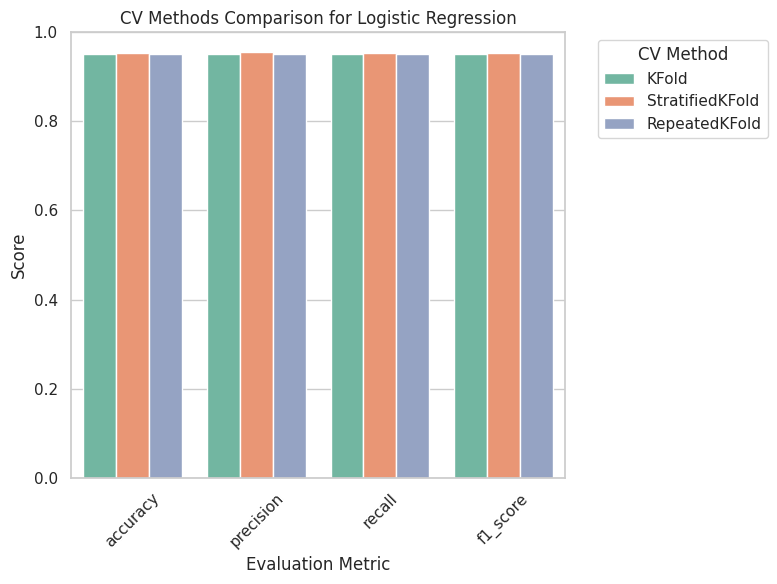

,Metric,KFold,StratifiedKFold,RepeatedKFold
0,accuracy,0.950737,0.954339,0.951630
1,precision,0.951186,0.956086,0.952271
2,recall,0.950737,0.954339,0.951630
3,f1_score,0.950580,0.954099,0.951532


Gaussian Naive Bayes CV Comparison:


<ipython-input-36-b8d9026f41f0>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='Metric', y='Score', hue='CV_Method', data=df_melted, palette=palette)


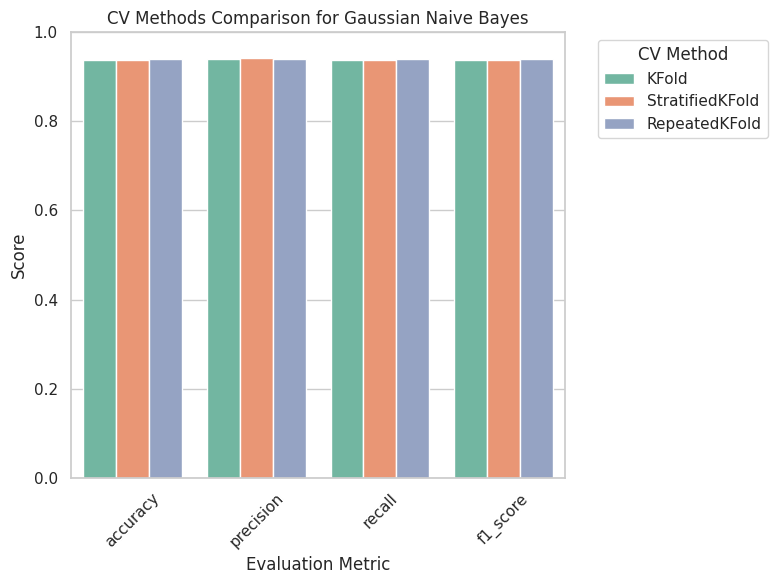

,Metric,KFold,StratifiedKFold,RepeatedKFold
0,accuracy,0.938457,0.938534,0.940234
1,precision,0.939439,0.941255,0.941035
2,recall,0.938457,0.938534,0.940234
3,f1_score,0.938148,0.937936,0.939876


KNN CV Comparison:


<ipython-input-36-b8d9026f41f0>:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='Metric', y='Score', hue='CV_Method', data=df_melted, palette=palette)


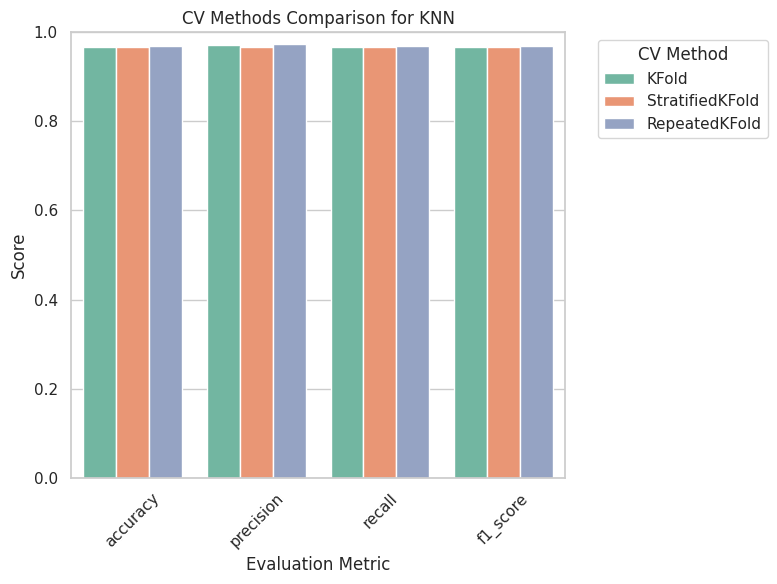

,Metric,KFold,StratifiedKFold,RepeatedKFold
0,accuracy,0.966667,0.966667,0.970000
1,precision,0.971101,0.967273,0.973243
2,recall,0.966667,0.966667,0.970000
3,f1_score,0.966583,0.966650,0.969903


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summarize CV Comparisons for Classification Models
results_lr = compare_cv_methods(lr, X_bc, y_bc)
results_gnb = compare_cv_methods(gnb, X_bc, y_bc)
results_knn = compare_cv_methods(knn_best, X_iris_reduced, y_iris)

def plot_cv_comparison(results_df, model_name):
    df_melted = results_df.melt(id_vars='Metric', var_name='CV_Method', value_name='Score')
    plt.figure(figsize=(8, 6))

    # Choose a color palette
    palette = sns.color_palette("Set2")  # You can choose other palettes like "Set1", "Paired", etc.

    sns.barplot(x='Metric', y='Score', hue='CV_Method', data=df_melted, palette=palette)
    plt.title(f'CV Methods Comparison for {model_name}')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.xlabel('Evaluation Metric')
    plt.xticks(rotation=45)
    plt.legend(title='CV Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    display(results_df)

print("Logistic Regression CV Comparison:")
plot_cv_comparison(results_lr, "Logistic Regression")

print("Gaussian Naive Bayes CV Comparison:")
plot_cv_comparison(results_gnb, "Gaussian Naive Bayes")

print("KNN CV Comparison:")
plot_cv_comparison(results_knn, "KNN")


## Summary

In this lecture, we covered:
- **Data Splitting and Cross-Validation** using KFold, StratifiedKFold, and cross_validate.
- **Classification Evaluation Metrics:** accuracy, precision, recall, f1_score, log loss, confusion matrices, and ROC curves.
- **Regression Evaluation Metrics:** RMSE, MAE, R², and residual plots using the California Housing dataset.
- **Hyperparameter Tuning** with GridSearchCV for KNN and cross-validation.
- **Visualization** of evaluation results with Matplotlib and Seaborn.

For more details, please refer to the latest [scikit-learn documentation](https://scikit-learn.org/stable/) and [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html).

Happy coding!
